In [1]:
!pip install corextopic

In [2]:
import pandas as pd
import numpy as np
import scipy.sparse as ss
from corextopic import corextopic as ct
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import plotly.express as px

In [53]:
df = pd.read_csv('CR_dataset.csv')

In [54]:
df['report_lemmatized_filtered'] = df['report_lemmatized_filtered'].map(lambda x: " ".join(eval(x)))

In [55]:
count_vec = CountVectorizer() # can add parameters to remove stuff
counts = count_vec.fit_transform(df.report_lemmatized_filtered)

In [56]:
df["Year"] = df["Year"].astype(str)
df["company_name"] = df["company_name"].astype(str)

df["filename"] = df["company_name"] + df["Year"] 

In [57]:
df.at[1095,'filename']='Google2022b'

# Unsupervised
https://github.com/gregversteeg/corex_topic/blob/master/corextopic/example/corex_topic_example.ipynb

In [58]:
# Document labels for each row can be provided
docs = df.filename.tolist()
# will probably help to locate documents for interpretation

In [59]:
vectorizer = CountVectorizer(max_features=10000, binary=True)
doc_word = vectorizer.fit_transform(df.report_lemmatized_filtered)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # 1096 documents, 10,000 tokens

(1096, 10000)

In [60]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

In [43]:
words[:5]

['aa', 'aappendix', 'aapproaches', 'aat', 'ab']

In [12]:
# Train the CorEx topic model with 50 topics
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words, docs=docs);

In [13]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=0, n_words=10)

[('function', 0.22227331240076395, 1.0),
 ('face', 0.20240837026166814, 1.0),
 ('capability', 0.20038667400709115, 1.0),
 ('respond', 0.19917534375002954, 1.0),
 ('contract', 0.19310340590000252, 1.0),
 ('expectation', 0.18973242817663713, 1.0),
 ('feedback', 0.18860692976138746, 1.0),
 ('expert', 0.18811176444021693, 1.0),
 ('government', 0.18800996895797636, 1.0),
 ('directly', 0.18643942827198384, 1.0)]

In [14]:
topic_model.get_topics(topic=5, n_words=10, print_words=False) 
# to get the column indices instead of the column labels (the words)

[(8798, 0.2684074647621856, 1.0),
 (4518, 0.23095150438887263, 1.0),
 (4351, 0.20900338190525683, 1.0),
 (2659, 0.2018777440459608, 1.0),
 (2750, 0.19802481829444277, 1.0),
 (11091, 0.17625249250475997, 1.0),
 (5547, 0.17527539364695502, 1.0),
 (4939, 0.16740003919973187, 1.0),
 (7054, 0.16390521319348658, 1.0),
 (1330, 0.16178223422859875, 1.0)]

In [15]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))
    
#topics = topic_model.get_topics()
#for topic_n,topic in enumerate(topics):
#    words,mis = zip(*topic)
#    topic_str = str(topic_n+1)+': '+','.join(words)
#    print(topic_str)

0: function, face, capability, respond, contract, expectation, feedback, expert, government, directly
1: tions, ment, ness, ing, sion, environ, ments, tion, tional, tive
2: index, identification, criterion, screen, disclose, disclosure, discrimination, accordance, procedure, promotion
3: determine, analysis, representative, basic, handle, transport, point, previous, depend, task
4: june, billion, understanding, would, draw, study, late, medium, particularly, sector
5: overseas, exhibition, establishment, cooperate, countermeasure, seminar, harmony, formulate, lecture, bod
6: mainly, moreover, ratio, divide, etc, accident, quantitative, scheme, carry, proportion
7: attend, special, conference, discussion, young, cultural, consult, talk, recognition, book
8: bargaining, boundary, restatement, precautionary, gri, assurance, substantiate, disclosures, complaint, ownership
9: calculation, specify, nature, label, indicate, indicator, weight, calculate, phase, not
10: chemical, manufacturing,

In [16]:
# access the topic assignments for each word
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[17 12 29 ... 27 47  0]
(13922,)


the most probable documents per topic can also be easily accessed

Documents are sorted according to log probabilities which is why the highest probability documents have a score of 0, and other documents have negative scores

In [17]:
# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=0, n_docs=10, sort_by='log_prob')
# the row indices follow each other, which means they come from the same company probably

[('Gartner2019', 0.0),
 ('acer2015', 0.0),
 ('acer2014', 0.0),
 ('acer2010', 0.0),
 ('acer2005', 0.0),
 ('acer2011', 0.0),
 ('acer2007', 0.0),
 ('acer2012', 0.0),
 ('acer2020', 0.0),
 ('acer2008', 0.0)]

In [18]:
topic_model.get_top_docs(topic=27, n_docs=10, sort_by='log_prob')

[('Gartner2019', 0.0),
 ('bosch2001', 0.0),
 ('Sopra Steria2019', 0.0),
 ('Silvergate Capital Corp2021', 0.0),
 ('Avnet, Inc.2014', 0.0),
 ('Garmin2019', 0.0),
 ('Motorola Solutions2015', 0.0),
 ('STMicroelectronics2019', 0.0),
 ('STMicroelectronics2020', 0.0),
 ('STMicroelectronics2008', 0.0)]

In [19]:
topic_model.get_top_docs(topic=44, n_docs=10, sort_by='log_prob')

[('Gartner2019', 0.0),
 ('Sunpower2019', 0.0),
 ('Bechtle2020', 0.0),
 ('Logitech2010', 0.0),
 ('Nordic Semiconductor2016', 0.0),
 ('Badger Meter2018', 0.0),
 ('Samsung SDI Co.2019', 0.0),
 ('Seagate2007', 0.0),
 ('Keysight2018', 0.0),
 ('Seagate2017', 0.0)]

In [20]:
top_docs = topic_model.get_top_docs()
for n, topic_docs in enumerate(top_docs):
    docs,probs = zip(*topic_docs)
    #topic_str = str(n+1)+': '+','.join(docs)
    #print(topic_docs)
    print('{}: '.format(n+1) + ', '.join(docs))

#for n,topic in enumerate(topics):
#    topic_words,_,_ = zip(*topic)
#    print('{}: '.format(n) + ', '.join(topic_words))

1: Gartner2019, acer2015, acer2014, acer2010, acer2005, acer2011, acer2007, acer2012, acer2020, acer2008
2: Verizon2009, Infinera2018, Facebook / Meta2021, Canon Inc.2017, Seiko Epson Corporation2007, Seiko Epson Corporation2011, Seiko Epson Corporation2015, Canon Inc.2012, Canon Inc.2008, Applied Materials, Inc.2013
3: Gartner2019, Seagen2010, Seagen2016, Seagen2018, Seagen2020, Cree2019, Cree2020, Infinera2015, Infinera2020, Micron Technology2019
4: Verizon2009, Seagen2016, Seagen2018, Seagen2020, Cree2019, Cree2018, Cree2020, Infinera2015, Infinera2020, Infinera2019
5: Google2022, acer2008, acer2009, acer2019, acer2018, Samsung SDI Co.2010, VMware2017, VMware2018, VMware2020, Samsung SDI Co.2005
6: Verizon2009, STMicroelectronics1999, First Solar2020, First Solar2021, Accenture2016, Accenture2020, Netgear2021, Netgear2020, STMicroelectronics2004, Tegna2018
7: Verizon2009, Sony Corporation2004, Sony Corporation2011, Sony Corporation2007, bosch2016, bosch2011, bosch2012, Sopra Steria2

CorEx is a discriminative model, whereas LDA is a generative model. This means that while LDA outputs a probability distribution over each document, CorEx instead estimates the probability a document belongs to a topic given that document's words. As a result, the probabilities across topics for a given document do not have to add up to 1.

In [21]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics
print(topic_model.labels.shape) # same thing

(1096, 50)
(1096, 50)


a document could possibly belong to no topics (all 0's across topics in labels) or all topics (all 1's across topics in labels)

In [22]:
topic_model.tc
# CorEx starts its algorithm with a random initialization, and so different runs can result in different topic models.
# One way of finding a better topic model is to restart the CorEx algorithm several times 
# and take the run that has the highest TC value 
# (i.e. the run that produces topics that are most informative about the documents)

400.70519654196505

For an unsupervised CorEx topic model, the topics are always sorted from high to low according to their TC. For an anchored CorEx topic model, the topics are not sorted, and are outputted such that the anchored topics come first.

In [23]:
topic_model.tcs # tcs = total correlation sum

array([27.64566931, 26.37330219, 19.69398242, 16.83453428, 12.28631813,
       11.54820763, 11.26210914, 11.02613372, 10.97700815,  9.96558711,
        9.64330495,  9.48544189,  9.30829898,  9.27030852,  9.17600704,
        9.06224542,  8.51378718,  8.3794288 ,  7.83888863,  7.62275303,
        7.57064565,  7.475756  ,  7.32336747,  7.31204621,  7.30549024,
        6.61698093,  6.55138658,  6.11702547,  6.02746284,  5.60110323,
        5.36094064,  5.32964976,  5.17701372,  5.17603997,  5.1759144 ,
        4.9451542 ,  4.82423918,  4.81979776,  4.80929072,  4.7879426 ,
        4.5088081 ,  4.41620396,  4.40964185,  4.39421505,  3.68609602,
        3.68193664,  3.43039419,  3.09498488,  2.86451347,  1.99783831])

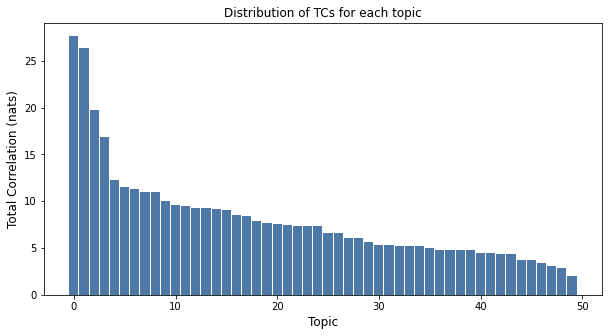

In [24]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.90)
plt.title('Distribution of TCs for each topic', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Total Correlation (nats)', fontsize=12);
# useful to select the number of topics for the model

# maybe around 10 is ok? idk

In [25]:
print(np.mean(topic_model.log_z, axis=0))
print(topic_model.tcs)
# the topic correlation is the average of the pointwise total correlations for each individual document

# The pointwise total correlations in log_z represent the correlations within an individual document 
# explained by a particular topic. These correlations have been used to measure how "surprising" documents 
# are with respect to given topics

[27.64566931 26.37330219 19.69398242 16.83453428 12.28631813 11.54820763
 11.26210914 11.02613372 10.97700815  9.96558711  9.64330495  9.48544189
  9.30829898  9.27030852  9.17600704  9.06224542  8.51378718  8.3794288
  7.83888863  7.62275303  7.57064565  7.475756    7.32336747  7.31204621
  7.30549024  6.61698093  6.55138658  6.11702547  6.02746284  5.60110323
  5.36094064  5.32964976  5.17701372  5.17603997  5.1759144   4.9451542
  4.82423918  4.81979776  4.80929072  4.7879426   4.5088081   4.41620396
  4.40964185  4.39421505  3.68609602  3.68193664  3.43039419  3.09498488
  2.86451347  1.99783831]
[27.64566931 26.37330219 19.69398242 16.83453428 12.28631813 11.54820763
 11.26210914 11.02613372 10.97700815  9.96558711  9.64330495  9.48544189
  9.30829898  9.27030852  9.17600704  9.06224542  8.51378718  8.3794288
  7.83888863  7.62275303  7.57064565  7.475756    7.32336747  7.31204621
  7.30549024  6.61698093  6.55138658  6.11702547  6.02746284  5.60110323
  5.36094064  5.32964976  5.

In [26]:
# create a results direcory named "corex" in the working directory
# vt.vis_rep(topic_model, column_label=words, prefix='corex')

NameError: name 'vt' is not defined

--------------

One way of finding a better topic model is to restart the CorEx algorithm several times and take the run that has the highest TC value (i.e. the run that produces topics that are most informative about the documents).

In [28]:
n_hidden_range = range(3,52)
tc_list = []
tcs_means_list = []

for t in n_hidden_range:
    topic_model = ct.Corex(n_hidden=t, words=words, max_iter=100, verbose=False, seed=1)
    topic_model.fit(doc_word, words=words, docs=docs)
    tcs_mean = np.mean(topic_model.log_z, axis=0)
    tcs_means_list.append(tcs_mean)
    tc = topic_model.tc
    tc_list.append(tc)

In [29]:
zipped = list(zip(n_hidden_range, tc_list, tcs_means_list))

new_df = pd.DataFrame(zipped, columns=['T','model TC','mean TCs'])

In [89]:
# then, plot tc_list or tcs_means_list to find the best nb of topics
px.line(new_df, x='T', y='model TC', template="plotly_white",height=400,
       color_discrete_sequence=['#533A71'], labels={'variable':'metric','T':'Number of topics'}, width=650)

-------------

### Re-running the model with t=15

In [66]:
topic_model = ct.Corex(n_hidden=15, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words, docs=docs);

In [67]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: joint, jointly, ministry, label, etc, eco, proposal, preparation, ratio, division
1: function, face, early, respond, response, would, expert, position, late, gain
2: gri, bargaining, assurance, collective, index, disclosure, complaint, boundary, precautionary, membership
3: trend, consultation, determine, satisfaction, promotion, indicator, selection, calculation, representative, criterion
4: tions, ment, con, er, ing, ness, tion, tive, tional, environ
5: june, billion, medium, image, attend, language, half, far, whether, forum
6: discharge, sox, ozone, specify, deplete, personnel, effluent, nox, spill, weight
7: domestic, english, version, wage, ngos, income, poor, grade, equip, satisfy
8: exercise, resolve, discussion, effectiveness, planning, emergency, conference, recognition, express, participant
9: align, representation, inclusion, collaborate, leverage, peer, conversation, transition, embed, insight
10: chemical, manufacturing, substance, wastewater, shipment, assembly, raw, 

a bunch of junk, but a few good ones
- 11 = LGBTQ+ diversity
- 13 = minority diversity & humanitarian? --> Sony, Google and Nvidia are the top docs for this one
- 14 = telecommunication) 

12 is Japan again, 4 is just random ends of words, 2 has 2 french words so I'm suspicious

In [68]:
# top documents for a specific topic
topic_model.get_top_docs(topic=14, n_docs=10, sort_by='log_prob')

KeyError: 895

In [59]:
top_docs = topic_model.get_top_docs()
for n, topic_docs in enumerate(top_docs):
    docs,probs = zip(*topic_docs)
    #topic_str = str(n+1)+': '+','.join(docs)
    #print(topic_docs)
    print('{}: '.format(n+1) + ', '.join(docs))

1: Verizon2009, Activision Blizzard2020, Nvidia2017, Nvidia2018, Nvidia2019, Nvidia2021, Nielsen2020, Activision Blizzard2021, ESCO Technologies Inc.2018, ESCO Technologies Inc.2020
2: Gartner2019, acer2016, acer2017, acer2015, acer2014, acer2010, acer2005, acer2011, acer2007, acer2012
3: Gartner2019, Seiko Epson Corporation2016, Seiko Epson Corporation2019, Seiko Epson Corporation2018, Seiko Epson Corporation2020, Seiko Epson Corporation2009, Applied Materials, Inc.2020, Applied Materials, Inc.2019, Applied Materials, Inc.2018, Applied Materials, Inc.2015
4: Gartner2019, Seagen2014, Seagen2017, Seagen2016, Seagen2018, Seagen2020, Cree2019, Cree2020, Infinera2015, Infinera2020
5: Verizon2009, Canon Inc.2012, Televisa2017, Texas Instruments2020, Canon Inc.2017, Canon Inc.2018, LG2016, LG2017, Canon Inc.2008, Micron Technology2017
6: Gartner2019, Televisa2016, Texas Instruments2020, Texas Instruments2019, Texas Instruments2017, LG2016, LG2017, LG2015, LG2014, LG2013
7: Verizon2009, Bilib

In [60]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(1096, 15)


In [61]:
topic_model.tc

363.0077483500498

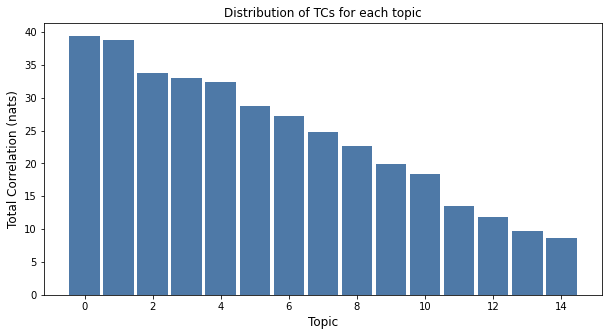

In [62]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.90)
plt.title('Distribution of TCs for each topic', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Total Correlation (nats)', fontsize=12);

In [63]:
topic_model.tcs

array([39.41553039, 38.73105363, 33.79395705, 32.95009768, 32.34609386,
       28.817434  , 27.22526428, 24.77671908, 22.73232935, 19.93865626,
       18.44610039, 13.52946405, 11.85403602,  9.7492162 ,  8.70179611])

----------

## Running the model with t=27

In [61]:
topic_model = ct.Corex(n_hidden=25, words=words, max_iter=100, verbose=False, seed=3) # max_iter=200
topic_model.fit(doc_word, words=words, docs=docs);

In [62]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: index, function, expectation, feedback, response, contract, infrastructure, position, face, concern
1: tions, ment, con, sion, ness, er, tive, ments, ing, tional
2: assurance, gri, complaint, identification, screen, bargaining, precautionary, collective, disclosure, criterion
3: joint, trend, basic, regional, second, would, conference, depend, study, apply
4: jointly, mainly, label, scheme, proposal, preparation, division, moreover, ratio, opinion
5: image, billion, medium, particular, special, mail, equip, parent, practical, cut
6: consultation, divide, domestic, attention, frequency, maintenance, express, serious, not, reliability
7: ministry, inspection, planning, logistics, liquid, transfer, warm, groundwater, damage, burden
8: flame, retardant, lcd, pollutant, chloride, vocs, display, dust, mold, thin
9: collaborate, explore, deploy, big, otherwise, collaboration, advocate, inform, real, embed
10: volume, weight, phase, indicate, transport, package, original, occur, packaging, 

In [82]:
# top documents for a specific topic
topic_model.get_top_docs(topic=8, n_docs=10, sort_by='log_prob')

[('Dell2004', 0.0),
 ('Telus2010', 0.0),
 ('Telus2011', 0.0),
 ('Dell2009', 0.0),
 ('Dell2008', 0.0),
 ('Dell2005', 0.0),
 ('Dell2011', 0.0),
 ('Dell2010', 0.0),
 ('Dell2012', 0.0),
 ('Dell2006', 0.0)]

In [78]:
df.loc[df['company_name']=='Dell'].head(1)

Year    Company                                report_preprocessed  \
289  2015  NYSE_DELL  annual update legacy good plan corporate socia...   

    company_name  nb_of_reports_in_dataset Global 500 Global 100 FAANG  \
289         Dell                        22        yes        yes    no   

     unique_words  total_word_count  \
289          3711             14891   

                                      report_tokenized  \
289  ['annual', 'update', 'legacy', 'good', 'plan',...   

                                     report_lemmatized  \
289  annual update legacy good plan corporate socia...   

                                   report_lemmatized_2  \
289  ['annual', 'update', 'legacy', 'good', 'plan',...   

                            report_lemmatized_filtered  filename  
289  annual update legacy good plan corporate socia...  Dell2015

In [64]:
top_docs = topic_model.get_top_docs()
for n, topic_docs in enumerate(top_docs):
    docs,probs = zip(*topic_docs)
    print('{}: '.format(n+1) + ', '.join(docs))

1: Gartner2019, HP2020, HP2018, HP2019, Dun & Bradstreet2021, acer2016, acer2017, acer2015, acer2014, acer2010
2: Verizon2009, Canon Inc.2008, Fujitsu2018, Fujitsu2019, Fujitsu2009, Fujitsu2008, Fujitsu2020, Fujitsu2005, Fujitsu2011, Fujitsu2010
3: Sea Group2015, First Solar2017, First Solar2021, First Solar2020, First Solar2022, First Solar2018, First Solar2019, HP2014, America Movil2017, STMicroelectronics2017
4: Gartner2019, Seagen2013, Seagen2011, Seagen2010, Seagen2014, Seagen2015, Seagen2017, Seagen2016, Seagen2018, Seagen2019
5: CHL2013, huawei2019, huawei2017, huawei2016, Televisa2020, huawei2014, Dell2008, huawei2015, huawei2011, huawei2010
6: Verizon2009, STMicroelectronics2004, STMicroelectronics2010, STMicroelectronics2011, STMicroelectronics2005, STMicroelectronics2015, STMicroelectronics2014, rexel2012, STMicroelectronics2003, STMicroelectronics2017
7: Verizon2009, First Solar2020, First Solar2021, First Solar2017, Intel2007, Intel2006, Intel2012, Intel2020, Intel2021, In

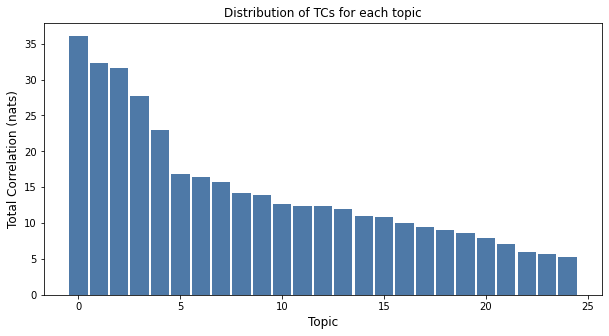

In [65]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.90)
plt.title('Distribution of TCs for each topic', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Total Correlation (nats)', fontsize=12);

In [66]:
topic_model.tcs

array([36.09257598, 32.26203745, 31.6305796 , 27.65584267, 22.96952254,
       16.87289537, 16.46149637, 15.74313713, 14.23337917, 13.85662242,
       12.72135578, 12.43503824, 12.35692941, 11.93403276, 11.04690339,
       10.86252627, 10.05140839,  9.43926333,  9.05889664,  8.67040889,
        7.90423872,  7.08015525,  6.02341994,  5.74925964,  5.20212787])

----------------

# Semi-supervised (with anchor words)

When anchoring a word to a topic, CorEx is trying to maximize the mutual information between that word and the anchored topic. So, anchoring provides a way to guide the topic model towards specific subsets of words that the user would like to explore.

The anchor strength controls how much weight CorEx puts towards maximizing the mutual information between the anchor words and their respective topics. 
- Anchor strength should always be set at a value greater than 1, since setting anchor strength between 0 and 1 only recovers the unsupervised CorEx objective. 
- Setting anchor strength from 1.5-3 seems to nudge the topic model towards the anchor words. 
- Setting anchor strength greater than 5 is strongly enforcing that the CorEx topic model find a topic associated with the anchor words.
- but depends on the size of the vocabulary 

--> experiment with the anchor strength and determine what values are best

if the topic with x words anchored to it is less interpretable than the other topics, this could be a sign that there is not a good topic around these words, and it might not be appropriate to anchor around them

In [93]:
# Anchor 'united' and 'nations' to first topic, and so on...
anchor_words = [['supply','chain'],  #1
                ['united', 'nation'], #2
                ['sustainable','development','goal'], #3
                ['recycle', 'waste'], #4
                ['equity', 'diversity', 'inclusion'], #5
                ['human','rights'], #6
                ['gender','women'], #7
                ['accessibility','disability'],#8
                ['covid'],#9
                ['ngo','nonprofit'],#10
                ['climate','change'],#11
                ['waste','management'],#12
                ['biodiversity','environment'],#13
                ['data','privacy'],#14
                ['artificial','intelligence'],#15
                ['innovation','technology'],#16
                ['minority','ethnicity'],
                ['health'],
                ['gender','discrimination'],
                ['sexual','gender','violence'],
                ['political','conflict'],
               ]

In [94]:
# Running the model with anchors
anchored_topic_model = ct.Corex(n_hidden=35, seed=0)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=3);

In [ ]:
# for 1 topic:
# topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=0))
# print('0: ' + ', '.join(topic_words))

In [95]:
# see all topics:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n+1) + ', '.join(topic_words))

1: chain, exercise, trend, supply, planning, basic, understanding, stage, closely, depend
2: nation, united, would, billion, half, study, late, clear, effect, regional
3: goal, sustainable, face, early, development, capability, position, gain, current, add
4: recycle, label, substance, disposal, weight, volume, reuse, phase, raw, hazardous
5: diversity, inclusion, equity, hire, talent, governance, security, oversight, inclusive, foster
6: serious, satisfaction, implementation, inspection, check, accord, ngos, human, provision, refer
7: gender, complaint, grievance, ratio, frequency, resolve, sanction, fine, sox, incident
8: disability, accessibility, text, emergency, computer, teacher, income, outstanding, agency, lack
9: covid, pandemic, sasb, esg, distancing, tcfd, coronavirus, racial, cybersecurity, lgbtq
10: ngo, nonprofit, realize, emphasize, minimize, organize, toward, recognize, analyze, maximize
11: climate, analysis, function, determine, previous, indicator, method, calculate,

-------

### Experiment 2: topics around specific organizations

In [99]:
anchors = ['sdg','sdi','gri','compact','cfsp','sasb','gaap','osha','rba','eicc']

In [100]:
anchored_topic_model = ct.Corex(n_hidden=10, seed=0)
anchored_topic_model.fit(doc_word, words=words, anchors=anchors, anchor_strength=3);

In [101]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n+1) + ', '.join(topic_words))

1: function, face, respond, early, discussion, late, expert, institute, basic, would
2: tions, ment, sion, ness, ments, tional, con, tive, tal, ing
3: gri, index, disclosure, feedback, trend, consultation, determine, screen, body, disclose
4: compact, joint, jointly, preparation, label, divide, ratio, mainly, eco, carry
5: explore, population, collaborate, teacher, listen, barrier, language, disability, gap, speak
6: sasb, inclusive, hispanic, black, inclusion, veteran, transgender, lesbian, conversation, gay
7: resolve, satisfaction, wage, domestic, special, medium, biodiversity, cultural, attend, rank
8: chemical, substance, tin, electronics, smelter, manufacturing, rohs, osha, discharge, mineral
9: bargaining, precautionary, boundary, substantiate, restatement, complaint, assurance, withdrawal, disclosures, rba
10: eicc, specify, volume, ministry, inspection, liquid, ozone, calculation, transfer, compound


IndexError: index 10 is out of bounds for axis 0 with size 10

-------

### Experiment 3: using SDG keywords as anchors

In [ ]:
sdg_anchors = ['poverty', # sdg 1
               'hunger', # sdg2
               'health', # sdg3
               ['education','access'],
               ['gender','equality'], 
               ['biodiversity','nature'],
               ['clean','energy'],
               [''],
               [''],
               ['inequality','discrimination','rights'],
               [''],
               [''],
               ['climate','change'],
               ['ocean','protection'],
               [''],
               ['peace','justice'] #sdg16
              ]

In [ ]:
anchored_topic_model = ct.Corex(n_hidden=35, seed=0)
anchored_topic_model.fit(doc_word, words=words, anchors=sdg_anchors, anchor_strength=3);

In [ ]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n+1) + ', '.join(topic_words))

----------------